## Evaluacion 3
#### Proyecto de montaña rusas

__Integrantes:__

Santiago Perrotta,  CI: 31.014.123 <br>
Jesus Araujo,  CI: 31.200.562 <br>
Lai Chang,  CI: 30.335.078 <br>

### Lectura de los Datos

### Metodo de Trazador Cubico Sujeto

### Polinomio de Minimos Cuadrados

Es una funcion polinomica que se ajusta a un conjunto de datos experimentales utilizando el metodo de <br>
minimos cuadrados.


Dado un conjunto de datos (x1,yi), queremos encontrar un polinomio de grado (m) que minimice <br>
la suma de los errores cuadrados entre los valores observados (yi) y los valores predichos <br>
por el polinomio.
<br>

__Pasos para realizar el Polinomio:__

__Paso 1:__ <br>
<br>
Formula del polinomio:
<br>
Pn(x) = c0 + c1x + c2x^2 + ... + cmx^m

__Paso 2:__ <br>
<br>
Minimizamos la funcion de error:
<br>
E = Ʃ(yi - Pn(xi))^2

__Paso 3:__ <br>
<br>
se deriva respecto a cada coeficiente, por ejemplo si tenemos 3 coeficientes <br>

dE/da0 = -2Ʃ (yi - c0 - c1x - c2x^2)

dE/da1 = -2Ʃ xi(yi - c0 - c1x - c2x^2)

dE/da2 = -2Ʃ xi^2(yi - c0 - c1x - c2x^2)

__Paso 4:__ <br>
<br>

Se busca el minimo de cada sumatoria, igualamdo a cero la derivada y reordenando, <br>
se obtiene el conjunto de ecuaciones:

c0(n) + c1 Ʃxi + c2 Ʃxi^2 = Ʃyi

c0 Ʃxi + c1 Ʃxi^2 + c2 Ʃxi^3 = Ʃxiyi

c0 Ʃxi^2 + c1 Ʃxi^3 + c2 Ʃxi^4 = Ʃxi^2yi

con incognitas c0, c1 y c2, cuyos coeficientes se pueden <br>
evaluar con los puntos observados. Simplemente se resuelve <br>
el sistema de ecuaciones para obtener los valores de los <br>
coeficientes c0, c1 y c2

__Paso 5:__

Esta forma que se va a mostrar acontinuacion, es una forma <br>
de realizar el ejercicio y asi ahorrarme hacer tantas derivadas <br>
como incognitas haya. 

<br>
Esta es una formula para saltarnos el paso 3 y obtener de una vez <br>
el sistema de ecuaciones a resolver.

n = cantidad de datos

c0          c1        c2            cm       
(n)         Ʃxi      Ʃxi^2   ....   Ʃxi^m        = Ʃyi
Ʃxi        Ʃxi^2     Ʃxi^3   ....   Ʃxi^m+1      = Ʃxiyi
Ʃxi^2      Ʃxi^3     Ʃxi^4   ....   Ʃxi^m+2      = Ʃxi^2yi
....       ....      ....    ....    ....        =  .....
Ʃxi^m     Ʃxi^m+1   Ʃxi^m+2  ....   Ʃxi^2m       = Ʃxi^myi

In [50]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

# funcion para construir el polinomio
def polinomio(grado,x,coef):

    px = 0 

    for i in range(grado+1):
        if i == 0:
            px += coef[i]
        else:
            px += coef[i]*(x**i)

    return px


# funcion para calcular la suma de potencias de los xi
def potencias_x(lista,exponente):

    potencia = np.zeros((len(lista)))
    resultado = 0

    # ciclo para sacar las potencias de los xi
    for i in range(len(lista)):
        potencia[i] = lista[i]**exponente

    # funcion sum para la sumatoria de la lista de potencias
    resultado = np.sum(potencia)

    return resultado


# funciom para calcula las suma de la multiplicacion de (xi^n)*yi
def multiplicacion_xiyi(lista_x,lista_y,exponente):

    potencia_x = np.zeros((len(lista_x)))
    multiplicacion = np.zeros(len(lista_x))
    resultado = 0

    if exponente != 0:

        # ciclo para calcular la potencia de xi
        for i in range(len(lista_x)):
            potencia_x[i] = lista_x[i]**exponente

        #ciclo para calcular la multiplicacion
        for j in range(len(lista_x)):
            multiplicacion[j] = lista_y[j] * potencia_x[j]

        # funcion sum para la sumatoria de la lista de multiplicacion
        resultado = np.sum(multiplicacion)

    else:
        resultado = np.sum(lista_y)

    return resultado

# funcion para construir la matriz y hallar los valores de los coeficientes
def sistema_ecuaciones(datos_x,datos_y,grado):
    
    a = np.zeros((grado+1,grado+1))
    b = np.zeros((grado+1))

    for i in range(grado+1):
        exponente_a = i
        exponente_b = i
        for j in range(grado+1):
            if i == 0 and j == 0:
                a[i][j] = len(datos_x)
                exponente_a += 1
            else:
                a[i][j] = potencias_x(datos_x,exponente_a)
                exponente_a += 1
        b[i] = multiplicacion_xiyi(datos_x,datos_y,exponente_b)

    return a,b
        

coeficiente c0 = 1.212857142857149
coeficiente c1 = 2.9559523809523567
coeficiente c2 = -1.3285714285714136
coeficiente c3 = 0.208333333333331


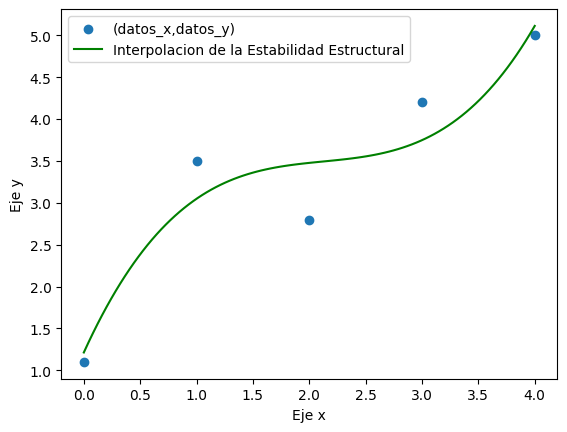

In [114]:
# declaracion de variables, vector de x y vector de y
datos_x = np.array([0,1,2,3,4])

datos_y = np.array([1.1,3.5,2.8,4.2,5.0])


# indicamos el grado del polinomio
grado_pol = 3
x = sy.Symbol('x') # declaramos una incognita


# obtenemos la matriz con las incognitas
matriz_a, result_b = sistema_ecuaciones(datos_x,datos_y,grado_pol)


# resolvemos el sistema de ecuaciones
solucion = np.linalg.solve(matriz_a,result_b)

# imprimimos los valores de los coeficientes
for i in range(len(solucion)):
    print("coeficiente c" + str(i) + " = " + str(solucion[i]))

# valores para graficar la curva ajustada
x_range = np.linspace(0,4,100)
y_range = np.zeros(100)

# ciclo para obtener los valores de y, evaluandolos en el polinomio
for i in range(100):
    valor = polinomio(grado_pol,x_range[i],solucion)
    y_range[i] = valor

# graficamos los puntos originales
fig, ax = plt.subplots()

ax.scatter(datos_x, datos_y, label="(datos_x,datos_y)")

# Configurar los ejes
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")

ax.plot(x_range, y_range, color = "green",label="Interpolacion de la Estabilidad Estructural")


# Mostrar la leyenda y mostrar la gráfica
ax.legend()
plt.show()

### Polinomios Ortogonales

### Resolucion de Ecuaciones